In [260]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [261]:
df=pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns',None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [262]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,21613.0,NaN,NaN,NaN,4580301520.864988,2876565571.312049,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0
date,21613,372,20140623T000000,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,21613.0,NaN,NaN,NaN,540088.141767,367127.196483,75000.0,321950.0,450000.0,645000.0,7700000.0
bedrooms,21613.0,NaN,NaN,NaN,3.370842,0.930062,0.0,3.0,3.0,4.0,33.0
bathrooms,21613.0,NaN,NaN,NaN,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,NaN,NaN,NaN,2079.899736,918.440897,290.0,1427.0,1910.0,2550.0,13540.0
sqft_lot,21613.0,NaN,NaN,NaN,15106.967566,41420.511515,520.0,5040.0,7618.0,10688.0,1651359.0
floors,21613.0,NaN,NaN,NaN,1.494309,0.539989,1.0,1.0,1.5,2.0,3.5
waterfront,21613.0,NaN,NaN,NaN,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,NaN,NaN,NaN,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Observation : Our target variable is price

In [264]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Observation : There are no null values.

In [265]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


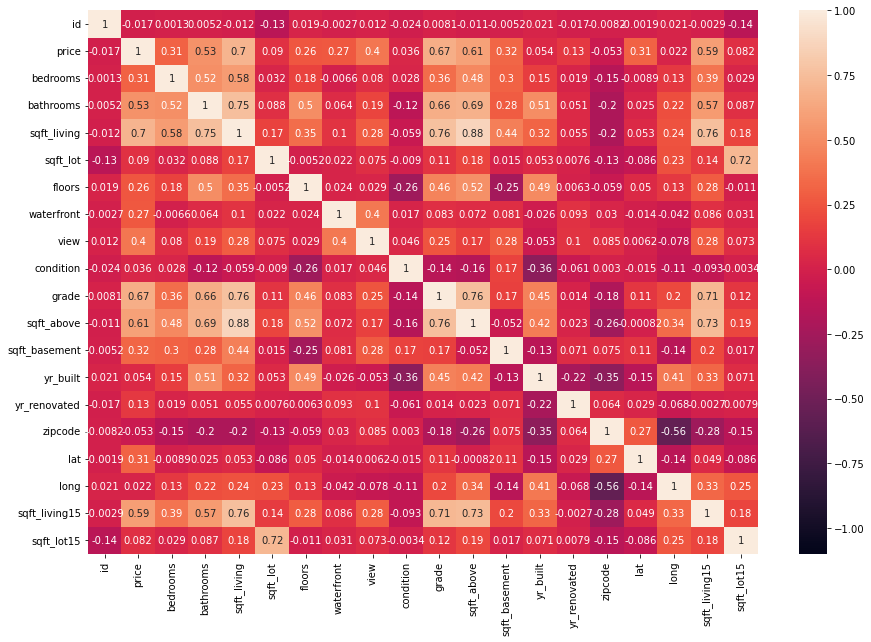

In [266]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g',vmax=-1,vmin=1)
plt.show()

OBSERVATION : The variables sqft_living and sqft_above are highly correlated.

In [267]:
columns=list(df.columns)
columns

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [268]:
discrete=[data for data in columns if df[data].dtypes=='O']
discrete

['date']

In [269]:
continuous=[data for data in columns if df[data].dtypes!='O']
continuous

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

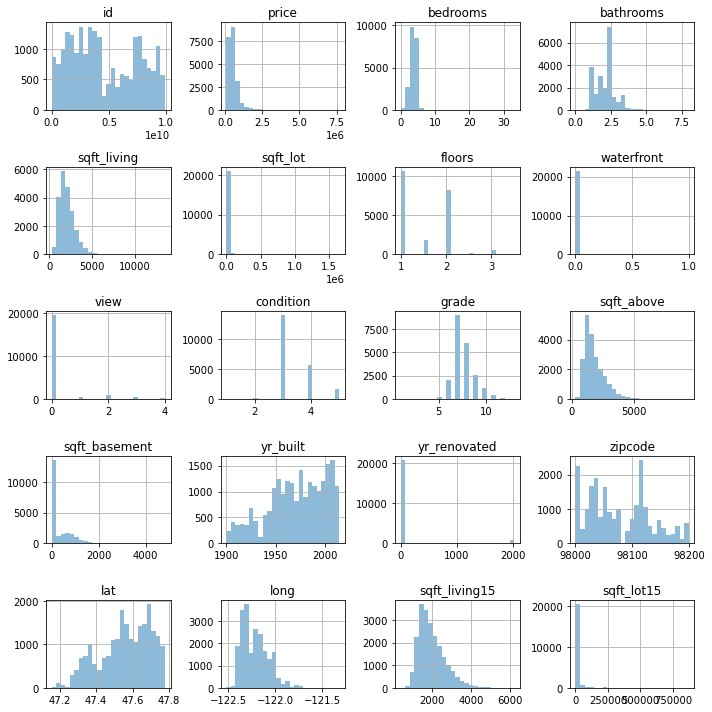

In [270]:
df1=df[continuous]
df1.hist(bins=25,figsize=(10,10),alpha=0.5)
plt.tight_layout()

plt.show()

In [271]:
for i in continuous:
    print(i)
    print(df[i].value_counts())

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: id, Length: 21436, dtype: int64
price
350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
bathrooms
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50    

In [272]:
discrete_numerical=['bedrooms','bathrooms','floors','waterfront','view','condition','grade']

bedrooms


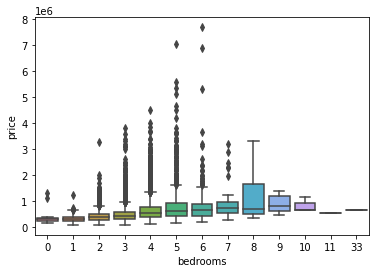

bathrooms


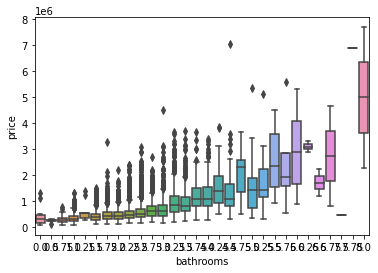

floors


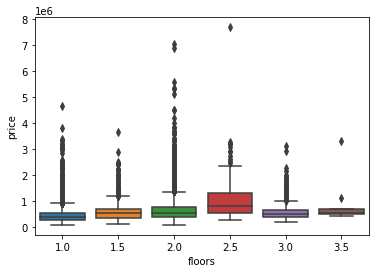

waterfront


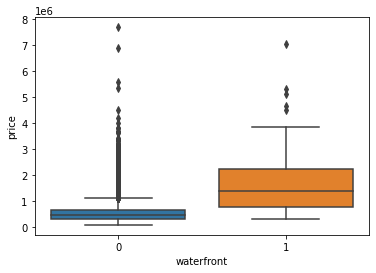

view


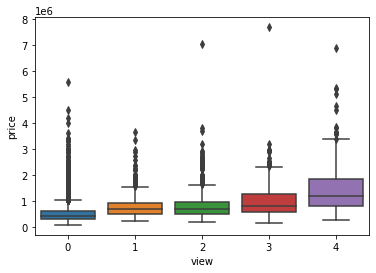

condition


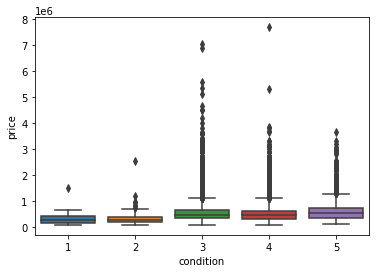

grade


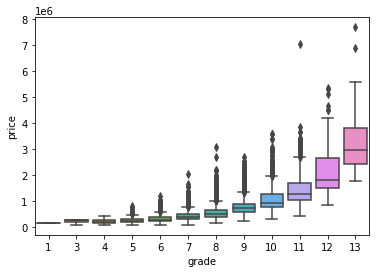

In [273]:
#discrete numerical vs price
for i in discrete_numerical:
    print(i)
    sns.boxplot(x=df[i],y=df['price'])
    plt.show()

Bedroom,bathroom and floor shows no relationship. Grade and waterfront effect price visibly. on the other hand view seems to be less effective

DATA PREPROCESSING

Preprocessing on data might improve the model accuracy and make it more reliable. We did binning here and created a new dataframe df_dm. There are various other techniques like transformation and normalization for data preprocessing.

In [274]:
df_dm=df.copy()

In [275]:
df_dm.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


Adding the ages and renovation ages of the houses when they were sold

In [276]:
#Extracting the year
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

#Age of the building when the house was sold
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']

#Age of the renovation when the houses were sold 
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0


In [277]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0.0


In [278]:
# partition the age into bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','76-100','>100']
df_dm['age_binned'] = pd.cut(df_dm['age'], bins=bins, labels=labels)

# partition the age_rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1','1-5','6-10','11-25','26-50','51-75','>75']
df_dm['age_rnv_binned'] = pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

In [279]:
df_dm.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned,age_rnv_binned
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,51-75,<1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,51-75,11-25


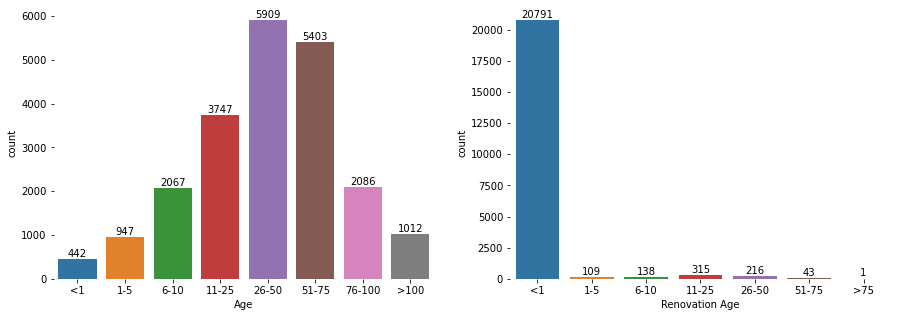

In [280]:
# histograms for the binned columns
f, axes = plt.subplots(1, 2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50,height,ha="center")   
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200,height,ha="center")
    
axes[0].set(xlabel='Age')
axes[1].set(xlabel='Renovation Age');

In [281]:
# transform the factor values to be able to use in the model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

In [282]:
df_dm.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# MODEL FITTING

Simple linear regression

In [283]:
#choosing sqft_living as the independent variable and price as the dependent valiable(because they have a good correlation between them

import statsmodels.api as sm
X=sm.add_constant(df['sqft_living'])
Y=df['price']

In [284]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=100)

In [285]:
df_lm=sm.OLS(train_Y,train_X).fit()

In [286]:
df_lm.params

const         -42628.976515
sqft_living      280.685417
dtype: float64

Thus the estimated prediction model can be written as
price= -42628.976515 + 280.685417 *(sqft_living)

In [287]:
df_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                 OLS               Adj. R-squared:      0.487      
Dependent Variable:    price             AIC:                 480613.6916
Date:                  2023-03-03 13:57  BIC:                 480629.2074
No. Observations:      17290             Log-Likelihood:      -2.4030e+05
Df Model:              1                 F-statistic:         1.642e+04  
Df Residuals:          17288             Prob (F-statistic):  0.00       
R-squared:             0.487             Scale:               6.9127e+10 
-------------------------------------------------------------------------
               Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-------------------------------------------------------------------------
const       -42628.9765 4963.3769  -8.5887 0.0000 -52357.6977 -32900.2554
sqft_living    280.6854    2.1903 128.1487 0.0000    276.3922    284.9786
-------------------------------------------------------------------------
Omnibus:               11909.901       Durbin-Watson:          2.018     
Prob(Omnibus):         0.000           Jarque-Bera (JB):       419310.893
Skew:                  2.854           Prob(JB):               0.000     
Kurtosis:              26.441          Condition No.:          5625      
=========================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

Observation :
The R-squared value is 0.487 ie the model explains 48.7% of variation in price. Also there is statistically significant relationship between sqft_living and price

In [288]:
pred_Y=df_lm.predict(test_X)
pred_Y

19836    641401.384197
10442    395240.273674
20548    628209.169608
11014    372785.440331
4138     485059.607046
             ...      
5625     204374.190258
8698     341910.044484
9786     555230.961243
2784     947348.488495
9552     774165.586337
Length: 4323, dtype: float64

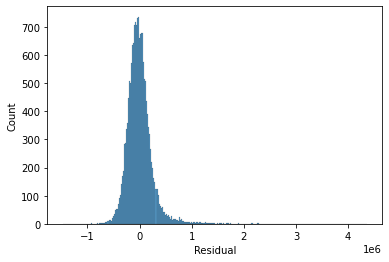

In [289]:
df_resid = df_lm.resid
res=pd.DataFrame(df_resid,columns=['Residual'])
sns.histplot(data=res,x=res['Residual'])
plt.show()

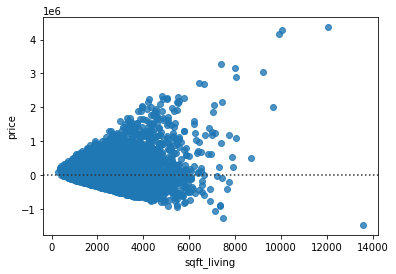

In [290]:
sns.residplot(x='sqft_living',y='price',data=df)
plt.show()

Thus we reject the model

Multiple Linear regression

1)  model 1

In [291]:
df_dm.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sales_yr,age,age_rnv,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,0.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,0.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [292]:
df_dm=df_dm.drop(['id','date','yr_built','yr_renovated','sales_yr','age','age_rnv'],axis=1)
df_dm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_binned_<1,age_binned_1-5,age_binned_6-10,age_binned_11-25,age_binned_26-50,age_binned_51-75,age_binned_76-100,age_binned_>100,age_rnv_binned_<1,age_rnv_binned_1-5,age_rnv_binned_6-10,age_rnv_binned_11-25,age_rnv_binned_26-50,age_rnv_binned_51-75,age_rnv_binned_>75
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [293]:
df_dm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75'],
      dtype='object')

In [294]:

X_features=[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'age_binned_<1', 'age_binned_1-5', 'age_binned_6-10',
       'age_binned_11-25', 'age_binned_26-50', 'age_binned_51-75',
       'age_binned_76-100', 'age_binned_>100', 'age_rnv_binned_<1',
       'age_rnv_binned_1-5', 'age_rnv_binned_6-10', 'age_rnv_binned_11-25',
       'age_rnv_binned_26-50', 'age_rnv_binned_51-75', 'age_rnv_binned_>75']

X=sm.add_constant(df_dm[X_features])


In [295]:
Y=df_dm['price']



In [296]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=3)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(17290, 32)
(17290,)
(4323, 32)
(4323,)


In [297]:
model_1=sm.OLS(train_Y,train_X).fit()

In [298]:
model_1.params

const                   6.900174e+06
bedrooms               -3.334919e+04
bathrooms               3.765496e+04
sqft_living             1.107176e+02
sqft_lot                1.228266e-01
floors                 -1.267260e+04
waterfront              5.698174e+05
view                    5.413861e+04
condition               3.172755e+04
grade                   9.523006e+04
sqft_above              7.053524e+01
sqft_basement           4.017808e+01
zipcode                -6.500612e+02
lat                     6.033358e+05
long                   -2.100317e+05
sqft_living15           2.423861e+01
sqft_lot15             -3.086516e-01
age_binned_<1           8.178355e+05
age_binned_1-5          8.081378e+05
age_binned_6-10         7.913930e+05
age_binned_11-25        7.731634e+05
age_binned_26-50        8.032623e+05
age_binned_51-75        8.996161e+05
age_binned_76-100       9.853594e+05
age_binned_>100         1.021406e+06
age_rnv_binned_<1       9.659579e+05
age_rnv_binned_1-5      1.080043e+06
a

In [299]:
model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:                     OLS                     Adj. R-squared:            0.700      
Dependent Variable:        price                   AIC:                       471557.4024
Date:                      2023-03-03 13:57        BIC:                       471782.3811
No. Observations:          17290                   Log-Likelihood:            -2.3575e+05
Df Model:                  28                      F-statistic:               1444.      
Df Residuals:              17261                   Prob (F-statistic):        0.00       
R-squared:                 0.701                   Scale:                     4.0878e+10 
-----------------------------------------------------------------------------------------
                        Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
-----------------------------------------------------------------------------------------
const                6900173.8975 2633933.6407   2.6197 0.0088 1737396.8035 12062950.9914
bedrooms              -33349.1904    2114.6929 -15.7702 0.0000  -37494.2031   -29204.1778
bathrooms              37654.9641    3684.3695  10.2202 0.0000   30433.2262    44876.7019
sqft_living              110.7176       2.5518  43.3882 0.0000     105.7159      115.7194
sqft_lot                   0.1228       0.0519   2.3688 0.0179       0.0212        0.2245
floors                -12672.5956    4463.4974  -2.8392 0.0045  -21421.5032    -3923.6880
waterfront            569817.4017   19383.6705  29.3968 0.0000  531823.4414   607811.3620
view                   54138.6091    2415.8714  22.4096 0.0000   49403.2560    58873.9621
condition              31727.5550    2661.2496  11.9221 0.0000   26511.2359    36943.8741
grade                  95230.0581    2424.6092  39.2765 0.0000   90477.5782    99982.5380
sqft_above                70.5352       2.5425  27.7428 0.0000      65.5517       75.5187
sqft_basement             40.1781       2.9858  13.4565 0.0000      34.3257       46.0305
zipcode                 -650.0612      37.7965 -17.1990 0.0000    -724.1462     -575.9762
lat                   603335.8113   12112.7937  49.8098 0.0000  579593.5072   627078.1155
long                 -210031.7322   14819.3606 -14.1728 0.0000 -239079.1822  -180984.2823
sqft_living15             24.2386       3.8814   6.2449 0.0000      16.6308       31.8465
sqft_lot15                -0.3087       0.0810  -3.8097 0.0001      -0.4675       -0.1498
age_binned_<1         817835.5498  329063.6043   2.4853 0.0130  172837.5086  1462833.5909
age_binned_1-5        808137.8409  328634.8286   2.4591 0.0139  163980.2436  1452295.4381
age_binned_6-10       791393.0347  328692.2676   2.4077 0.0161  147122.8512  1435663.2182
age_binned_11-25      773163.4098  328457.7604   2.3539 0.0186  129352.8842  1416973.9354
age_binned_26-50      803262.2932  328542.1667   2.4449 0.0145  159286.3227  1447238.2637
age_binned_51-75      899616.1023  330193.3342   2.7245 0.0064  252403.6760  1546828.5286
age_binned_76-100     985359.4311  330459.1882   2.9818 0.0029  337625.9039  1633092.9582
age_binned_>100      1021406.2357  330353.1732   3.0919 0.0020  373880.5087  1668931.9627
age_rnv_binned_<1     965957.8881  377244.1349   2.5606 0.0105  226521.1201  1705394.6561
age_rnv_binned_1-5   1080042.5304  377409.4228   2.8617 0.0042  340281.7814  1819803.2794
age_rnv_binned_6-10  1073155.5530  377183.4871   2.8452 0.0044  333837.6608  1812473.4452
age_rnv_binned_11-25 1027152.3213  376773.3704   2.7262 0.0064  288638.2994  1765666.3432
age_rnv_binned_26-50  970708.1689  376874.3066   2.5757 0.0100  231996.3018  1709420.0360
age_rnv_binned_51-75  878748.7627  378113.3583   2.3240 0.0201  137608.2286  1619889.2968
age_rnv_binned_>75    904408.6731  417583.3557   2.1658 0.0303   85902.9406  1722914.4055
--------------------

Model shows 51.4% variability in price. 

In [300]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 
def get_vif_factors( X ): 
 X_matrix = X.to_numpy() 
 vif = [ variance_inflation_factor( X_matrix, i ) for i in range( X_matrix.shape[1] ) ] 
 vif_factors = pd.DataFrame() 
 vif_factors['column'] = X.columns 
 vif_factors['vif'] = vif 
 return vif_factors 

In [301]:
vif_factors = get_vif_factors( X[X_features] ) 
vif_factors

,column,vif
0,bedrooms,1.684530
1,bathrooms,3.400051
2,sqft_living,inf
3,sqft_lot,2.104094
4,floors,2.465011
5,waterfront,1.209197
6,view,1.442612
7,condition,1.260733
8,grade,3.436710
9,sqft_above,inf


In [302]:
columns_with_large_vif = vif_factors[vif_factors.vif>4].column 
columns_with_large_vif

2              sqft_living
9               sqft_above
10           sqft_basement
16           age_binned_<1
17          age_binned_1-5
18         age_binned_6-10
19        age_binned_11-25
20        age_binned_26-50
21        age_binned_51-75
22       age_binned_76-100
23         age_binned_>100
24       age_rnv_binned_<1
25      age_rnv_binned_1-5
26     age_rnv_binned_6-10
27    age_rnv_binned_11-25
28    age_rnv_binned_26-50
29    age_rnv_binned_51-75
30      age_rnv_binned_>75
Name: column, dtype: object

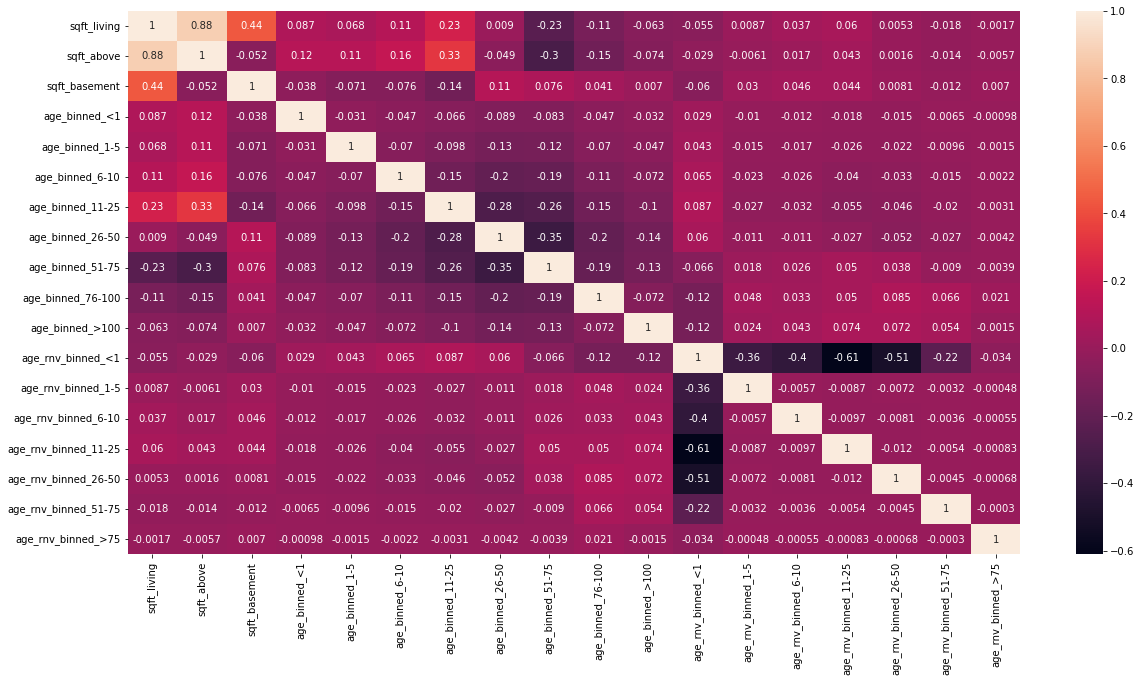

In [303]:
plt.figure(figsize=(20,10))
sns.heatmap(X[columns_with_large_vif].corr(),annot=True,fmt='.2g')
plt.show()

To remove multi collinearity we have to remove one of the variables that are highly correlated we do that for the next model. Here the variables sqft_above and sqft_living are highly correlated.

In [304]:
columns_to_be_removed=['sqft_living']

In [305]:
X_new_features=list(set(X_features)-set(columns_to_be_removed))

In [306]:
get_vif_factors(X[X_new_features])

,column,vif
0,age_binned_76-100,inf
1,bedrooms,1.684530
2,age_binned_11-25,inf
3,age_binned_6-10,inf
4,bathrooms,3.400051
5,sqft_living15,2.987317
6,age_rnv_binned_<1,inf
7,lat,1.192699
8,sqft_above,4.952146
9,floors,2.465011


Thus there is no multicollinearity, thus we create a new model

In [307]:
train_X=train_X[X_new_features]
model_1=sm.OLS(train_Y,train_X).fit()

model_1.summary2()



<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                    Adj. R-squared:           0.700      
Dependent Variable:         price                  AIC:                      471557.4024
Date:                       2023-03-03 13:57       BIC:                      471782.3811
No. Observations:           17290                  Log-Likelihood:           -2.3575e+05
Df Model:                   28                     F-statistic:              1444.      
Df Residuals:               17261                  Prob (F-statistic):       0.00       
R-squared:                  0.701                  Scale:                    4.0878e+10 
----------------------------------------------------------------------------------------
                        Coef.       Std.Err.      t     P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
age_binned_76-100    4205440.5852 1559592.1890   2.6965 0.0070 1148481.7064 7262399.4640
bedrooms              -33349.1904    2114.6929 -15.7702 0.0000  -37494.2031  -29204.1778
age_binned_11-25     3993244.5640 1557604.5369   2.5637 0.0104  940181.6849 7046307.4431
age_binned_6-10      4011474.1889 1557827.2079   2.5750 0.0100  957974.8520 7064973.5258
bathrooms              37654.9641    3684.3695  10.2202 0.0000   30433.2262   44876.7019
sqft_living15             24.2386       3.8814   6.2449 0.0000      16.6308      31.8465
age_rnv_binned_<1    4646050.6357 1781073.8282   2.6086 0.0091 1154965.2793 8137135.9922
lat                   603335.8113   12112.7937  49.8098 0.0000  579593.5072  627078.1155
sqft_above               181.2529       4.1274  43.9146 0.0000     173.1627     189.3430
floors                -12672.5956    4463.4974  -2.8392 0.0045  -21421.5032   -3923.6880
waterfront            569817.4017   19383.6705  29.3968 0.0000  531823.4414  607811.3620
long                 -210031.7322   14819.3606 -14.1728 0.0000 -239079.1822 -180984.2823
age_binned_>100      4241487.3899 1559464.0684   2.7198 0.0065 1184779.6403 7298195.1395
age_binned_51-75     4119697.2565 1559338.6894   2.6420 0.0083 1063235.2626 7176159.2503
age_rnv_binned_11-25 4707245.0689 1780479.8326   2.6438 0.0082 1217324.0041 8197166.1337
age_rnv_binned_6-10  4753248.3006 1780711.9824   2.6693 0.0076 1262872.1986 8243624.4026
age_rnv_binned_1-5   4760135.2780 1780874.5793   2.6729 0.0075 1269440.4697 8250830.0864
age_rnv_binned_26-50 4650800.9166 1780526.9090   2.6120 0.0090 1160787.5772 8140814.2559
zipcode                 -650.0612      37.7965 -17.1990 0.0000    -724.1462    -575.9762
sqft_lot15                -0.3087       0.0810  -3.8097 0.0001      -0.4675      -0.1498
sqft_lot                   0.1228       0.0519   2.3688 0.0179       0.0212       0.2245
age_binned_1-5       4028218.9951 1557744.0549   2.5859 0.0097  974882.6464 7081555.3437
age_rnv_binned_51-75 4558841.5103 1781048.3150   2.5596 0.0105 1067806.1622 8049876.8584
sqft_basement            150.8957       4.9386  30.5543 0.0000     141.2155     160.5759
grade                  95230.0581    2424.6092  39.2765 0.0000   90477.5782   99982.5380
age_binned_<1        4037916.7039 1558118.3086   2.5915 0.0096  983846.7801 7091986.6277
age_rnv_binned_>75   4584501.4207 1792993.0593   2.5569 0.0106 1070053.1623 8098949.6790
view                   54138.6091    2415.8714  22.4096 0.0000   49403.2560   58873.9621
age_binned_26-50     4023343.4474 1557694.6035   2.5829 0.0098  970104.0285 7076582.8663
condition              31727.5550    2661.2496  11.9221 0.0000   26511.2359   36943.8741
----------------------------------------------------------------------------------------
Omnibus:                  15261.969          Durbin-Watson:             2.008           
Prob(Omnibus):            0.000              Jarque-Bera (JB):  

In [308]:
pred_train_Y=model_1.predict(train_X)
pred_test_Y=model_1.predict(test_X[X_new_features])

print(pred_train_Y)
print('***********************')
print(pred_test_Y)

14084    474872.880160
13750    640701.379844
619      232085.664264
18985    327915.030723
21382    502109.685450
             ...      
6400     151663.035156
15288    177738.830730
11513    249797.026828
1688     399432.440734
5994     236950.597177
Length: 17290, dtype: float64
***********************
4131     5.209306e+05
17459    1.253677e+06
2192     7.881672e+05
12418    6.035739e+04
15773    1.422613e+05
             ...     
13300    4.047299e+05
20400    1.350361e+05
10378    1.068375e+06
9914     1.264257e+06
15860    1.778488e+05
Length: 4323, dtype: float64


In [309]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score

print('the r2 score for training dataset is',metrics.r2_score(train_Y,pred_train_Y))
print('RMSE for training dataset is ',np.sqrt(metrics.mean_squared_error(train_Y,pred_train_Y)))

print('**********************************************************************************************')

print('the r2 score for testing dataset is',metrics.r2_score(test_Y,pred_test_Y))
print('RMSE for testing dataset is ',np.sqrt(metrics.mean_squared_error(test_Y,pred_test_Y)))

print('**********************************************************************************************')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
ols = LinearRegression()
ols_cv_mse = cross_val_score(ols, X, Y, cv=5)
print('CV : ',ols_cv_mse.mean())

the r2 score for training dataset is 0.7007648952192335
RMSE for training dataset is  202014.21551181548
**********************************************************************************************
the r2 score for testing dataset is 0.7131690871254839
RMSE for testing dataset is  191879.54960459218
**********************************************************************************************
CV :  0.6982685163973728


2) model 2- without preprocessing

In [310]:
#here i consider all the columns
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [311]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [312]:
X_features=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

X=sm.add_constant(df[X_features])
Y=df['price']

In [313]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,train_size=0.8,random_state=3)

In [314]:
model_2=sm.OLS(train_Y,train_X).fit()
model_2.params

const            7.580920e+06
bedrooms        -3.513233e+04
bathrooms        4.258211e+04
sqft_living      1.107041e+02
sqft_lot         1.135818e-01
floors           6.829927e+03
waterfront       5.617950e+05
view             5.281740e+04
condition        2.489184e+04
grade            9.577088e+04
sqft_above       7.020079e+01
sqft_basement    4.050613e+01
yr_built        -2.709480e+03
yr_renovated     2.267151e+01
zipcode         -5.804279e+02
lat              5.986292e+05
long            -2.088755e+05
sqft_living15    2.328574e+01
sqft_lot15      -3.753535e-01
dtype: float64

In [315]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.697      
Dependent Variable:       price                AIC:                    471708.4446
Date:                     2023-03-03 13:57     BIC:                    471848.0865
No. Observations:         17290                Log-Likelihood:         -2.3584e+05
Df Model:                 17                   F-statistic:            2346.      
Df Residuals:             17272                Prob (F-statistic):     0.00       
R-squared:                0.698                Scale:                  4.1263e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|     [0.025        0.975]   
----------------------------------------------------------------------------------
const         7580919.9404 3309406.2089   2.2907 0.0220 1094148.3897 14067691.4910
bedrooms       -35132.3305    2105.3763 -16.6870 0.0000  -39259.0813   -31005.5796
bathrooms       42582.1114    3674.9361  11.5872 0.0000   35378.8642    49785.3586
sqft_living       110.7041       2.5598  43.2465 0.0000     105.6865      115.7216
sqft_lot            0.1136       0.0521   2.1811 0.0292       0.0115        0.2157
floors           6829.9272    4055.9523   1.6839 0.0922   -1120.1504    14780.0047
waterfront     561794.9853   19439.6651  28.8994 0.0000  523691.2716   599898.6990
view            52817.4040    2421.0166  21.8162 0.0000   48071.9661    57562.8419
condition       24891.8356    2663.4875   9.3456 0.0000   19671.1302    30112.5410
grade           95770.8783    2426.3212  39.4716 0.0000   91015.0429   100526.7138
sqft_above         70.2008       2.5398  27.6405 0.0000      65.2226       75.1790
sqft_basement      40.5061       2.9856  13.5672 0.0000      34.6540       46.3582
yr_built        -2709.4803      81.8737 -33.0934 0.0000   -2869.9611    -2548.9996
yr_renovated       22.6715       4.1988   5.3995 0.0000      14.4413       30.9017
zipcode          -580.4279      37.2706 -15.5733 0.0000    -653.4820     -507.3737
lat            598629.2304   12108.6382  49.4382 0.0000  574895.0724   622363.3884
long          -208875.4967   14846.4100 -14.0691 0.0000 -237975.9649  -179775.0285
sqft_living15      23.2857       3.8945   5.9791 0.0000      15.6520       30.9194
sqft_lot15         -0.3754       0.0812  -4.6206 0.0000      -0.5346       -0.2161
----------------------------------------------------------------------------------
Omnibus:              15073.191        Durbin-Watson:           2.008             
Prob(Omnibus):        0.000            Jarque-Bera (JB):        1645765.720       
Skew:                 3.690            Prob(JB):                0.000             
Kurtosis:             50.223           Condition No.:           172689472384912096
==================================================================================
* The condition number is large (2e+17). This might indicate             strong
multicollinearity or other numerical problems.
"""

69.8% variability of price is explained by the features

In [316]:
pred_train_Y=model_2.predict(train_X)
pred_test_Y=model_2.predict(test_X)

In [317]:
from sklearn import  metrics
from sklearn.model_selection import cross_val_score

print('the r2 score for training dataset is',metrics.r2_score(train_Y,pred_train_Y))
print('RMSE for training dataset is ',np.sqrt(metrics.mean_squared_error(train_Y,pred_train_Y)))

print('**********************************************************************************************')

print('the r2 score for testing dataset is',metrics.r2_score(test_Y,pred_test_Y))
print('RMSE for testing dataset is ',np.sqrt(metrics.mean_squared_error(test_Y,pred_test_Y)))

print('**********************************************************************************************')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
ols = LinearRegression()
ols_cv_mse = cross_val_score(ols, X, Y, cv=5)
print('CV : ',ols_cv_mse.mean())

the r2 score for training dataset is 0.6977550478867836
RMSE for training dataset is  203027.65045267038
**********************************************************************************************
the r2 score for testing dataset is 0.7077188146879438
RMSE for testing dataset is  193693.98878852147
**********************************************************************************************
CV :  0.6945908283283125


3. model 3 - ridge regression

In [318]:
import sklearn
from sklearn import linear_model


train_data_dm,test_data_dm=train_test_split(df_dm,train_size=0.8,random_state=3)


features =['floors','age_binned_6-10','grade','condition','sqft_lot','sqft_basement','age_binned_26-50','age_rnv_binned_<1'
 ,'age_binned_51-75','age_rnv_binned_51-75','zipcode','age_binned_>100','age_binned_76-100',
 'sqft_lot15','bedrooms','waterfront','age_binned_<1','long','bathrooms','age_binned_11-25','lat','age_binned_1-5',
 'sqft_living15','sqft_above','age_rnv_binned_26-50','age_rnv_binned_11-25','view','age_rnv_binned_1-5']

print('alpha =1')

complex_model_R=linear_model.Ridge(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])



RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)

R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)

cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

print('******************************************************************************************************************')

print('alpha 100')
complex_model_R=linear_model.Ridge(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])


RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)


R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)

cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

print('*************************************************************************************************************')

print('alpha 1000')

complex_model_R=linear_model.Ridge(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])



RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)


R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)


cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

alpha =1
RMSE: 191899.3806679551
R_squared_training: 0.7007498284645337
R_squared_testing: 0.7131097951794712
CV: 0.698271444633027
******************************************************************************************************************
alpha 100
RMSE: 195389.35395092945
R_squared_training: 0.6935513916277947
R_squared_testing: 0.7025798637974823
CV: 0.6907219446358768
*************************************************************************************************************
alpha 1000
RMSE: 209636.57056471735
R_squared_training: 0.6510260822167021
R_squared_testing: 0.6576245096072126
CV: 0.6478690401560705


4. lasso regression

In [319]:
import sklearn
from sklearn import linear_model


train_data_dm,test_data_dm=train_test_split(df_dm,train_size=0.8,random_state=3)


features =['floors','age_binned_6-10','grade','condition','sqft_lot','sqft_basement','age_binned_26-50','age_rnv_binned_<1'
 ,'age_binned_51-75','age_rnv_binned_51-75','zipcode','age_binned_>100','age_binned_76-100',
 'sqft_lot15','bedrooms','waterfront','age_binned_<1','long','bathrooms','age_binned_11-25','lat','age_binned_1-5',
 'sqft_living15','sqft_above','age_rnv_binned_26-50','age_rnv_binned_11-25','view','age_rnv_binned_1-5']

print('alpha =1')

complex_model_R=linear_model.Lasso(alpha=1)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])



RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)


R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)


cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

print('******************************************************************************************************************')

print('alpha 100')
complex_model_R=linear_model.Lasso(alpha=100)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])


RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)

R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)


cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

print('*************************************************************************************************************')

print('alpha 1000')

complex_model_R=linear_model.Lasso(alpha=1000)
complex_model_R.fit(train_data_dm[features],train_data_dm['price'])


pred=complex_model_R.predict(test_data_dm[features])



RMSE=np.sqrt(metrics.mean_squared_error(test_data_dm['price'],pred))
print('RMSE:',RMSE)

R_squared_training=complex_model_R.score(train_data_dm[features],train_data_dm['price'])
print('R_squared_training:',R_squared_training)


R_squared_testing=complex_model_R.score(test_data_dm[features],test_data_dm['price'])
print('R_squared_testing:',R_squared_testing)


cv = cross_val_score(complex_model_R,df_dm[features],df_dm['price'],cv=5).mean()
print('CV:',cv)

alpha =1
RMSE: 191876.8146938168
R_squared_training: 0.7007529400894349
R_squared_testing: 0.7131772636233484
CV: 0.6982674905110766
******************************************************************************************************************
alpha 100
RMSE: 192025.61635068533
R_squared_training: 0.700585291871039
R_squared_testing: 0.7127322255122706
CV: 0.6981769520004194
*************************************************************************************************************
alpha 1000
RMSE: 193587.68883705634
R_squared_training: 0.6973538572547167
R_squared_testing: 0.7080395365697904
CV: 0.6947462055670606


In [320]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2, include_bias=False)
poly_features=PF.fit_transform(X)

In [321]:
poly_features.shape

(21613, 209)

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=101)

In [323]:
from sklearn.linear_model import LinearRegression
polymodel=LinearRegression()
polymodel.fit(X_train, Y_train)

LinearRegression()

In [324]:
Y_pred=polymodel.predict(X_test)


In [325]:
MAE_Poly = metrics.mean_absolute_error(Y_test,Y_pred)
MSE_Poly = metrics.mean_squared_error(Y_test,Y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,1.005545e+05
MSE,2.408723e+10
RMSE,1.552006e+05


Thus the best model is with the Lasso regression where alpha=1 and CV: 0.6982674905110766. The best property of lasso regression is that it can select the important variables by itself and eliminate overfitting.